# In this tutorial we are going derive linear regression y =  β1x + B2x^2 + B3x^3 + B0
* First we just plot a simple linear line 
* Write the equations to determine simple linear regression



In [45]:
import numpy as np
import matplotlib.pyplot as plt

### y = 4x + 3x^2 + 2x^3 + 5
* y = 5 + 4x + 3x^2 + 2x^3
* y = x0 + x1 + x2 + x3
(equal diamensions)

In [46]:
β0, β1, β2, β3 = 5, 4, 3, 2

In [47]:


x = np.linspace(-10, 10, 400)  # 400 points between -10 and 10


# Compute y values
x0 = np.ones(len(x)) * β0

x1 = x * β1 

x2 = x ** 2 * β2

x3 = x ** 3 * β3

y = x0 + x1 + x2 + x3


# Given input matrix of size n x number of columns of predictors predict n x 1 y predictions
* n x (number predictors) = [x0, x1, x2, x3] 
* n x 1 = [y]

## Assumptions of errors e, Stats 601 Dr. Cline, I miss stats (notice there is no error term we looking for the actual values β0, β1, β2, β3) 

ignore this but this is what we are minimizing it's zero anyways
* The errors are independent 
* Mean zero or centered around zero 
* Constant varience 
* Follow a normal distribution 

In short independent and identically distributed 


In [48]:
# Add some noise
e = np.random.normal(0, 1, len(x)) # mean zero and sd one, more samples means constant varience to fix structural shape 
Yi = y + e

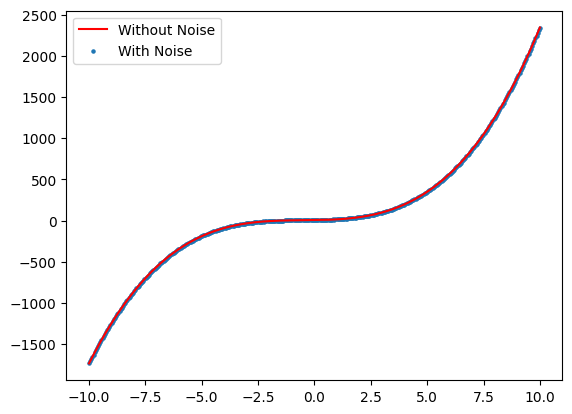

In [49]:

# Plot the data
plt.plot(x, y, 'r-', label='Without Noise')
plt.scatter(x, Yi, s=5, label='With Noise')
plt.legend()
plt.show()


## Yi = β0 + β1X1 + β2X2 + β3X3 + ..... + εi
* Xi and Yi we aready have input and output machinelearninng is about finding the path from Xi to Yi
* minimize SSE (y - Yi)^2 easiest form compared to rmse or mse  
* [simplest one](https://tahera-firdose.medium.com/linear-regression-derivation-of-slope-and-intercept-using-ordinary-least-square-971534ec6b77)
* [more detailed](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)
* β1 is cov(x,y) divided by the variance(x), y is what we trying to get ps if we also devide by var(y) it would be pearson correlation 

# Notice Simple Linear Regression Doesn't have terms for β2, β3, ..... βn because it's a straight line 2 dimensional, we can't plot N*D but imagine the bending in the straight line is being caused by other dimensions our predictions suck but don't confuse this with a poly normial this was on purpose to prove we can calculate [x0, x1, ... , xn-1 + xn]
* b = (x'x)^(-1) * x * y 
* where x = [x0, x1, ... , xn-1 + xn]
* .. [proof](https://www.youtube.com/watch?v=fBaXhzlSO18)

# Create the matrix 

In [96]:
xT_matrix = np.array([x0,x1,x2,x3]) # The resultant here is x transpose normal vector in form of [x1,x2,x3,x4] for each n
xT_matrix.shape

(4, 400)

# Creating our own custom transpose matrix 

In [51]:
def transpose(matrix):
    transposed = []
    for i in range(len(matrix[0])):   
        new_row = [] 
        for row in matrix:
            new_row.append(row[i])  # This packages separate list of [x0[i],x1[i],x2[i],x3[i]]
        transposed.append(new_row)

    return transposed


In [98]:
x_matrix = np.array(transpose(xT_matrix))
x_matrix.shape

(400, 4)

In [100]:
x_matrix[0] # This is the x matrix of element index 0 

array([    5.,   -40.,   300., -2000.])

# find inverse of xTx

### Easiest way to find the inverse is to use numpy we will try both 
 * Numpy has built  in linear algebra functions [numpy.linalg](https://numpy.org/doc/stable/reference/routines.linalg.html)
 * The package also comes with the least squares function which will do the whole job
 * The answer should be column x column matrix square X' * X
 * processes of finging the inverse rule of thumbs:
   * The matrix need to be a square { m x n where m = n } 
   * X.transpose 
   * You need to find the inverse 
   * Find the determinent 


In [104]:
def matrix_multiply(A, B):
    # This function multiplies matrices A and B

    # Initialize sizes
    rows_A = len(A)
    cols_A = len(A[0])
    
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        raise ValueError("Number of A columns must be equal to number of B rows for matrix multiplication")
    
    # initialize the matrix structure with zeroes to compute sum += for dot product adding the multiplications saving to memory
    result = []
    for i in range(rows_A):
        result.append([0] * cols_B)    

    # Matrix multiplication dot product
    for i in range(rows_A):
        for j in range(cols_B):
            sum = 0
            for k in range(cols_A):  # or for k in range(rows_B)
                sum += A[i][k] * B[k][j]
            result[i][j] = sum

    return result



In [105]:
xTx_matrix = np.array(matrix_multiply(xT_matrix, x_matrix))
xTx_matrix.shape # we got a 4,4 which is what we want

(4, 4)

In [107]:
xTx_matrixnp = xT_matrix @ x_matrix # dot product and np build functions can work too

In [108]:
np.round(xTx_matrixnp,2) == np.round(xTx_matrix,2) # These two are equal 

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [109]:
## Easiest way to find the inverse
## Since it's a 4 * 4 will do it on paper 
## Essentially X'*X is a square matrix an inverse is very probable 
def matrix_inverse(A):
    return np.linalg.inv(A)

In [110]:
xTx_matrixnp_inverse = matrix_inverse(xTx_matrix)

In [112]:
np.array(matrix_multiply(xTx_matrix, xTx_matrixnp_inverse)) #  proof Identity matrix 

array([[ 1.00000000e+00, -4.93038066e-32, -8.62555040e-33,
         1.54074396e-33],
       [-1.97215226e-31,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.93330933e-30,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.84217094e-14,  0.00000000e+00,
         1.00000000e+00]])

In [113]:
xT_matrix

array([[    5.        ,     5.        ,     5.        , ...,
            5.        ,     5.        ,     5.        ],
       [  -40.        ,   -39.79949875,   -39.59899749, ...,
           39.59899749,    39.79949875,    40.        ],
       [  300.        ,   297.00001884,   294.01511297, ...,
          294.01511297,   297.00001884,   300.        ],
       [-2000.        , -1970.07531297, -1940.45062027, ...,
         1940.45062027,  1970.07531297,  2000.        ]])

In [118]:
xTy_matrix = np.array(matrix_multiply(xT_matrix,Yi.reshape(400,1)))
xTy_matrix.shape

(4, 1)

In [117]:
xTy_matrix # your 4 to 1 solution 

array([[2.10875906e+05],
       [6.67880087e+06],
       [7.47058800e+06],
       [2.38489386e+08]])

Now lets get (X'*X)^(-1) * (X' Y)

In [123]:
xTx_matrixnp_inverse.shape

(4, 4)

In [121]:
solution = matrix_multiply(xTx_matrixnp_inverse, xTy_matrix)

In [122]:
solution

[[0.9884007335311564],
 [0.9996979425083907],
 [0.9999472281240054],
 [1.000030263125761]]

In [124]:


x1_1 = x * solution[1]

x2_1 = x ** 2 * solution[2]

x3_1 = x ** 3 * solution[3]

y2_1 = solution[0] + x1_1 + x2_1 + x3_1


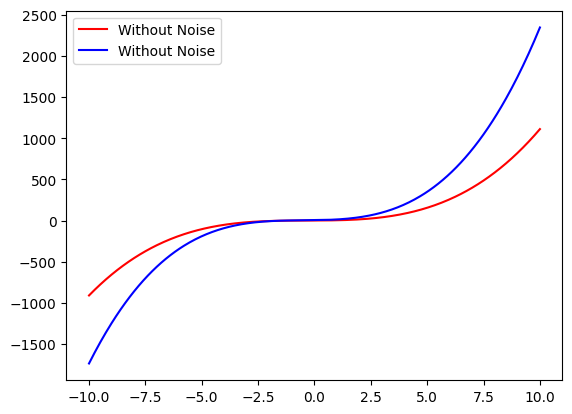

In [125]:
plt.plot(x, y2_1, 'r-', label='Without Noise')
plt.plot(x, y, 'b',  label='Without Noise')
plt.legend()
plt.show()